In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [10]:
path = "./XRPUSDT/XRPUSDT_EMA.csv"
res = pd.read_csv(path) 

In [11]:
res

,freq,EMA_S,EMA_L,num_trades,strat_multiple,bh_multiple,outperf_net,outperf,num_samples
0,5.0,10.0,50.0,15048.0,0.089,0.357,-0.357,-0.268,474156.0
1,5.0,10.0,60.0,13794.0,0.081,0.357,-0.357,-0.276,474156.0
2,5.0,10.0,70.0,12872.0,0.069,0.357,-0.357,-0.288,474156.0
3,5.0,10.0,80.0,11970.0,0.112,0.357,-0.357,-0.245,474156.0
4,5.0,10.0,90.0,11392.0,0.109,0.357,-0.357,-0.248,474156.0
...,...,...,...,...,...,...,...,...,...
11435,715.0,45.0,100.0,33.0,0.468,0.370,0.083,0.098,3323.0
11436,715.0,45.0,110.0,29.0,0.343,0.370,-0.036,-0.027,3323.0
11437,715.0,45.0,120.0,31.0,0.286,0.370,-0.093,-0.084,3323.0
11438,715.0,45.0,130.0,31.0,0.339,0.370,-0.041,-0.031,3323.0


In [13]:
res = res[["freq", "EMA_S", "EMA_L", "outperf_net"]];

In [ ]:
# 3D Scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(res['EMA_S'], res['EMA_L'], res['freq'], c=res['outperf_net'], cmap='viridis')
ax.set_xlabel('EMA_S')
ax.set_ylabel('EMA_L')
ax.set_zlabel('Freq')
plt.colorbar(sc)
plt.title('3D Scatter Plot of net_outperform')
plt.show()

In [19]:
freq_values = res['freq'].unique()
freq_values

array([  5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,  55.,
        60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100., 105., 110.,
       115., 120., 125., 130., 135., 140., 145., 150., 155., 160., 165.,
       170., 175., 180., 185., 190., 195., 200., 205., 210., 215., 220.,
       225., 230., 235., 240., 245., 250., 255., 260., 265., 270., 275.,
       280., 285., 290., 295., 300., 305., 310., 315., 320., 325., 330.,
       335., 340., 345., 350., 355., 360., 365., 370., 375., 380., 385.,
       390., 395., 400., 405., 410., 415., 420., 425., 430., 435., 440.,
       445., 450., 455., 460., 465., 470., 475., 480., 485., 490., 495.,
       500., 505., 510., 515., 520., 525., 530., 535., 540., 545., 550.,
       555., 560., 565., 570., 575., 580., 585., 590., 595., 600., 605.,
       610., 615., 620., 625., 630., 635., 640., 645., 650., 655., 660.,
       665., 670., 675., 680., 685., 690., 695., 700., 705., 710., 715.])

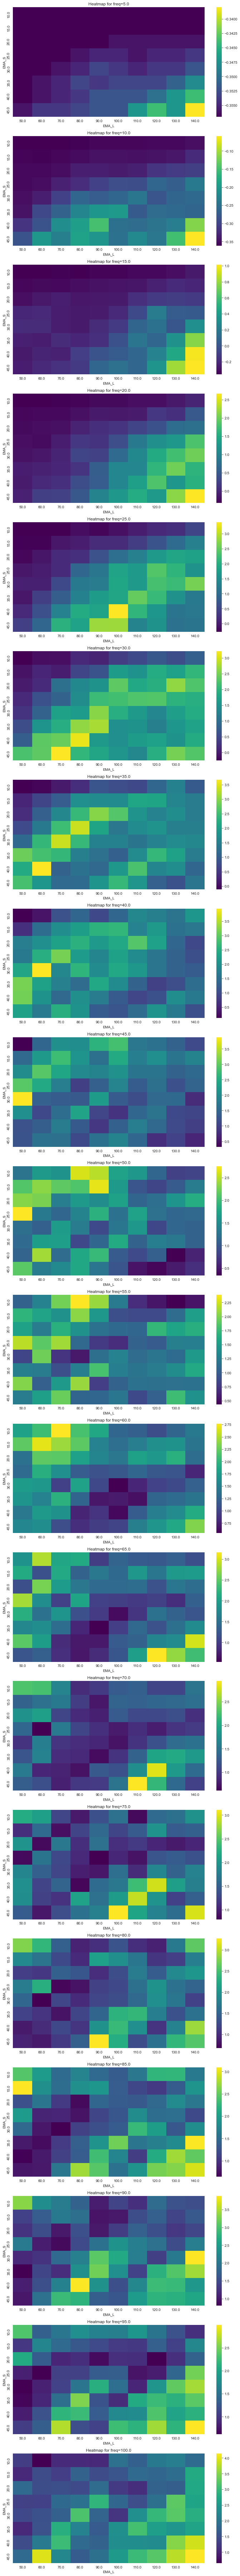

In [20]:
# Get the unique freq values
freq_values = res['freq'].unique()[:20]

# Set up the plotting environment
sns.set_style("whitegrid")
plt.figure(figsize=(10, 5 * len(freq_values)))

for i, freq_val in enumerate(freq_values):
    # Filter the dataframe for the current freq value
    subset = res[res['freq'] == freq_val]
    
    # Group by EMA_S, EMA_L and aggregate the net_outperform column using mean
    agg_subset = subset.groupby(['EMA_S', 'EMA_L']).agg({'outperf_net':'mean'}).reset_index()
    
    # Pivot the aggregated data for the heatmap
    pivot_table = agg_subset.pivot(index='EMA_S', columns='EMA_L', values='outperf_net')
    
    # Create the heatmap
    plt.subplot(len(freq_values), 1, i+1)
    sns.heatmap(pivot_table, cmap='viridis')
    plt.title(f'Heatmap for freq={freq_val}')

plt.tight_layout()
plt.show()

     freq  EMA_S  EMA_L  num_trades  strat_multiple  bh_multiple  outperf_net  \
601  40.0   30.0   60.0       868.0          10.247        0.364        3.938   
680  45.0   30.0   50.0       830.0           9.706        0.359        3.873   
513  35.0   25.0   80.0       944.0           9.530        0.364        3.344   
385  25.0   40.0  100.0       932.0           9.484        0.355        3.379   
541  35.0   40.0   60.0       840.0           9.333        0.364        3.665   
522  35.0   30.0   70.0       922.0           9.326        0.364        3.345   
530  35.0   35.0   50.0      1050.0           9.103        0.364        2.822   
504  35.0   20.0   90.0       962.0           8.752        0.364        2.980   
652  45.0   15.0   70.0      1026.0           8.703        0.359        2.760   
670  45.0   25.0   50.0       960.0           8.629        0.359        2.945   

     outperf  num_samples  
601    9.883      59287.0  
680    9.347      52701.0  
513    9.166      67759.

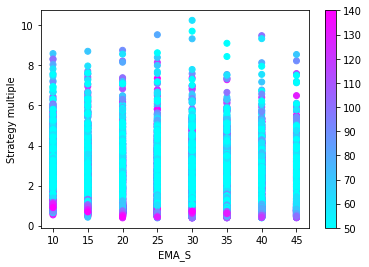

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
results_df = pd.read_csv(path)

# Filter the results based on the criteria of interest
filtered_df = results_df[(results_df['outperf_net'] > 0)]

# Sort the results based on the performance metric of interest (e.g. strat_multiple)
sorted_df = filtered_df.sort_values(by='strat_multiple', ascending=False)

# Print the top 10 results based on the performance metric of interest
print(sorted_df.head(10))

# Visualize the results using a scatter plot
plt.scatter(filtered_df['EMA_S'], filtered_df['strat_multiple'], c=filtered_df['EMA_L'], cmap='cool')
plt.colorbar()
plt.xlabel('EMA_S')
plt.ylabel('Strategy multiple')
plt.show()

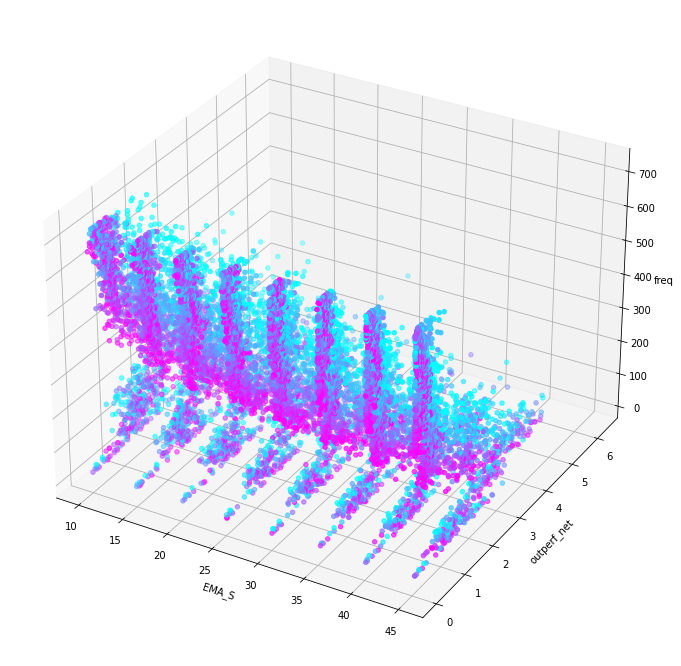

In [4]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(111, projection='3d')

x = filtered_df['EMA_S']
y = filtered_df['outperf_net']
z = filtered_df['freq']
c = filtered_df['EMA_L']

ax.scatter(x, y, z, c=c, cmap='cool')

ax.set_xlabel('EMA_S')
ax.set_ylabel('outperf_net')
ax.set_zlabel('freq')
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data
data = {
    'freq': np.random.choice([1, 5, 15, 30], 1000),
    'EMA_S': np.random.randint(5, 30, 1000),
    'EMA_L': np.random.randint(30, 60, 1000),
    'net_outperform': np.random.rand(1000)
}
df = pd.DataFrame(data)

# 3D Scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(df['EMA_S'], df['EMA_L'], df['freq'], c=df['net_outperform'], cmap='viridis')
ax.set_xlabel('EMA_S')
ax.set_ylabel('EMA_L')
ax.set_zlabel('Freq')
plt.colorbar(sc)
plt.title('3D Scatter Plot of net_outperform')
plt.show()

# Heatmap for a given freq
freq_val = 5
subset = df[df['freq'] == freq_val]
pivot_table = subset.pivot('EMA_S', 'EMA_L', 'net_outperform')
sns.heatmap(pivot_table, cmap='viridis')
plt.title(f'Heatmap for freq={freq_val}')
plt.show()

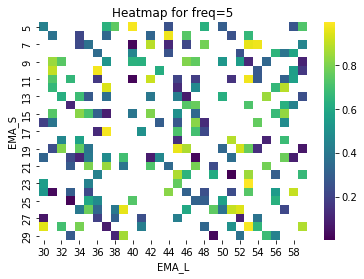

In [6]:
# Group by EMA_S, EMA_L, and freq then aggregate the net_outperform column using mean (or another suitable method)
agg_subset = subset.groupby(['EMA_S', 'EMA_L']).agg({'net_outperform':'mean'}).reset_index()

# Pivot the aggregated data for the heatmap
pivot_table = agg_subset.pivot(index='EMA_S', columns='EMA_L', values='net_outperform')

sns.heatmap(pivot_table, cmap='viridis')
plt.title(f'Heatmap for freq={freq_val}')
plt.show()


In [8]:
freq_values

array([ 5, 15,  1, 30])

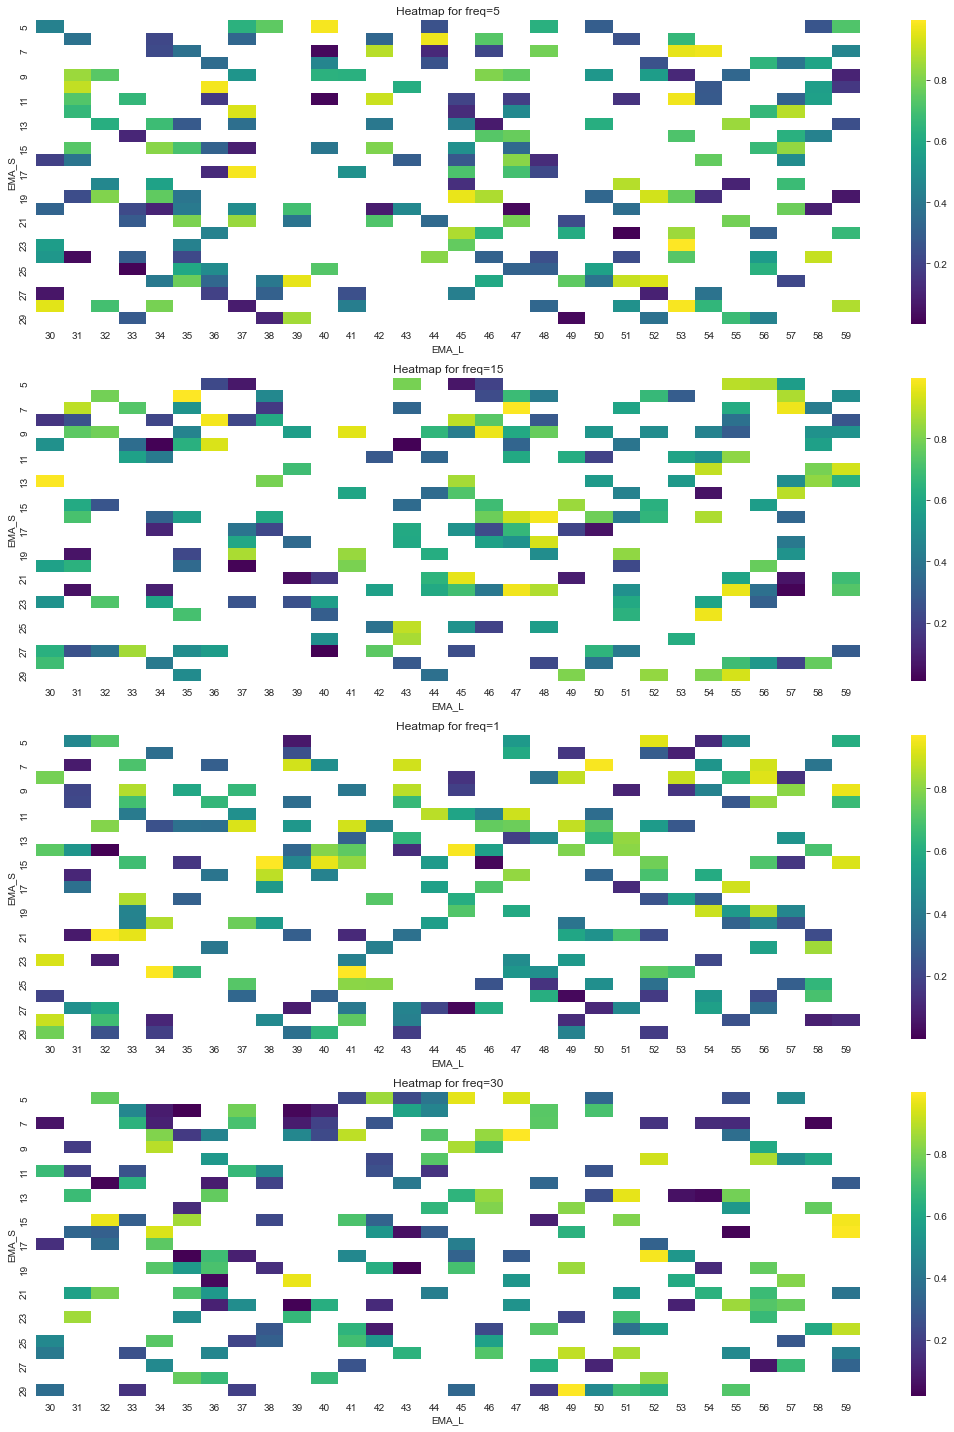

In [7]:
# Get the unique freq values
freq_values = df['freq'].unique()

# Set up the plotting environment
sns.set_style("whitegrid")
plt.figure(figsize=(15, 5 * len(freq_values)))

for i, freq_val in enumerate(freq_values):
    # Filter the dataframe for the current freq value
    subset = df[df['freq'] == freq_val]
    
    # Group by EMA_S, EMA_L and aggregate the net_outperform column using mean
    agg_subset = subset.groupby(['EMA_S', 'EMA_L']).agg({'net_outperform':'mean'}).reset_index()
    
    # Pivot the aggregated data for the heatmap
    pivot_table = agg_subset.pivot(index='EMA_S', columns='EMA_L', values='net_outperform')
    
    # Create the heatmap
    plt.subplot(len(freq_values), 1, i+1)
    sns.heatmap(pivot_table, cmap='viridis')
    plt.title(f'Heatmap for freq={freq_val}')

plt.tight_layout()
plt.show()

In [20]:
ticker = "XRPUSDT"
path = os.path.join("../../../hist_data", ticker, f"{ticker}.parquet.gzip")
df = pd.read_parquet(path)

In [21]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2018-05-04 10:12:00,0.90000,0.92999,0.85000,0.90000,167543.47
2018-05-04 10:13:00,0.90000,0.93000,0.89001,0.91000,179750.59
2018-05-04 10:14:00,0.91000,1.50000,0.90009,0.92999,107222.48
2018-05-04 10:15:00,0.92999,0.95001,0.91020,0.91020,171304.56
2018-05-04 10:16:00,0.91020,0.92981,0.91020,0.92977,62126.16
...,...,...,...,...,...
2022-11-09 23:56:00,0.33070,0.33230,0.33070,0.33220,479109.00
2022-11-09 23:57:00,0.33210,0.33250,0.33150,0.33170,618964.00
2022-11-09 23:58:00,0.33170,0.33170,0.33120,0.33130,369159.00
